Idea from [here](https://github.com/iro-cp/FCRN-DepthPrediction)
Use depth prediction + plane fitting from [here](https://github.com/ankush-me/SynthText)

On the planes detected paste signs of interest. 

In [1]:
import os
import sys
import argparse
import random
from pathlib import Path

import numpy as np
import skimage
from matplotlib import cm

import tensorflow as tf
from matplotlib import pyplot as plt

from PIL import Image as PILImage
from IPython.display import display, Image

In [2]:
sys.path.append('/home/harsimrat/workspace/FCRN-DepthPrediction/tensorflow')

In [3]:
import models

In [19]:
def load_model(model_path, sessionm, height=228, width=304):
    
    # Default input size
    height = height
    width = width
    channels = 3
    batch_size = 1
    
    # Create a placeholder for the input image
    input_node = tf.placeholder(tf.float32, shape=(None, height, width, channels))

    # Construct the network
    model = models.ResNet50UpProj({'data': input_node}, batch_size, 1, False)
        
    with session.as_default():

        # Load the converted parameters
        print('Loading the model')

        # Use to load from ckpt file
        saver = tf.train.Saver()     
        saver.restore(session, model_path)
        
    return model, input_node

def predict(model, input_node, session, image_path, width=304, height=228):

    # Read image
    img = PILImage.open(image_path)
    img = img.resize([width, height], PILImage.ANTIALIAS)
    img = np.array(img).astype('float32')
    img = np.expand_dims(np.asarray(img), axis = 0)
   
    pred = session.run(model.get_output(), feed_dict={input_node: img})

    depth = pred[0, :, :, 0]
    
    depth /= depth.max()
    depth *= 255.0
    depth = depth.astype(np.uint8)
    
    depth = np.uint8(cm.jet(depth) * 255.0)

    print(depth.min(), depth.max(), depth.shape)
    pil_image = PILImage.fromarray(depth).convert('RGB')
    pil_image = pil_image.resize([width, height], PILImage.ANTIALIAS)

    display(pil_image)


In [5]:
model_path = '/data/pre-trained-models/NYU_FCRN.ckpt'
images_path = '/nas/team-space/experiments/bdd-index/berlin/verified-construction'
default_height = 360
default_width = 640

In [6]:
session = tf.Session()

In [7]:
model, input_node = load_model(model_path, session, height=default_height, width=default_width)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loading the model
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /data/pre-trained-models/NYU_FCRN.ckpt


In [8]:
images = [i for i in Path(images_path).iterdir() if i.suffix == '.jpg']

/nas/team-space/experiments/bdd-index/berlin/verified-construction/oneplus-video_10-53-2019-05-31-0000000913.jpg


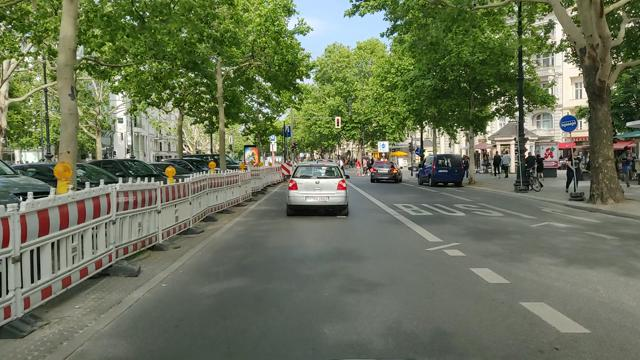

0 255 (192, 320, 4)


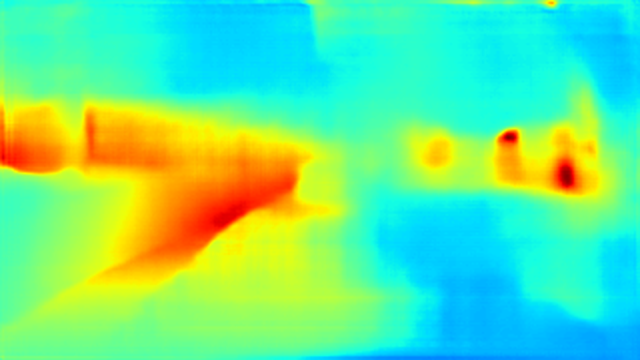

In [21]:
test_image = str(random.choice(images))
print(test_image)
display(Image(filename=test_image))
predict(model, input_node, session, test_image, height=default_height, width=default_width)